In [2]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import os
#import cartopy
#from cdo import *
#from cdo import Cdo
#cdo = Cdo()


In [18]:
import os
import rasterio
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm
import cartopy.crs as ccrs
from cartopy.feature import NaturalEarthFeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

# 红黄蓝色带定义
cmap = plt.get_cmap("RdYlGn")
# cmap = cmap.reversed()  # 翻转色带，红为低值

# fT 文件
fT_slope_file = r"/mnt/d/study/组会/DATA/fT趋势绘图/fT_5yr_slope.tif"

# 打开 TIF 文件
with rasterio.open(fT_slope_file) as src:
    data = src.read(1)
    data[data == src.nodata] = np.nan  # 将 nodata 转为 NaN
    extent = (src.bounds.left, src.bounds.right, src.bounds.bottom, src.bounds.top)

# 定义颜色条带的范围
levels = [-0.06, -0.003, -0.001, 0, 0.001, 0.003, 0.05]
norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)

# 创建绘图窗口，使用墨卡托投影
fig = plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.Mercator())  # 修改为墨卡托投影

# 显示数据（使用pcolormesh替代imshow以支持投影变换）
lons = np.linspace(extent[0], extent[1], data.shape[1])
lats = np.linspace(extent[2], extent[3], data.shape[0])
lon, lat = np.meshgrid(lons, lats)

img = ax.pcolormesh(lon, lat, data, 
                   cmap=cmap, 
                   norm=norm,
                   transform=ccrs.PlateCarree(),  # 原始数据坐标系
                   shading='auto')  # 自动插值

# 添加高精度海岸线
coastline_highres = NaturalEarthFeature('physical', 'coastline', '10m',
                                       edgecolor='black', facecolor='none')
ax.add_feature(coastline_highres, linewidth=0.2)

# 设置标题
ax.set_title("Mean Annual f(T) Slope (Mercator Projection)", fontsize=16)

# 配置坐标轴
ax.set_xticks(np.arange(-180, 181, 60), crs=ccrs.PlateCarree())
ax.set_yticks(np.arange(-60, 91, 30), crs=ccrs.PlateCarree())  # 限制纬度范围
ax.xaxis.set_major_formatter(LongitudeFormatter())
ax.yaxis.set_major_formatter(LatitudeFormatter())

# 设置地图范围（墨卡托投影建议限制纬度范围）
ax.set_extent([-180, 180, -60, 85], crs=ccrs.PlateCarree())  # 避免极区变形

# 添加颜色条
cbar = plt.colorbar(img, ax=ax, 
                   orientation='vertical', 
                   pad=0.01, 
                   aspect=20, 
                   shrink=0.85,
                   boundaries=levels, 
                   ticks=levels)
cbar.ax.set_yticklabels([f"{level:.3f}" for level in levels])

# 保存图片
#plt.savefig("fT_slope_mercator.png", dpi=500, bbox_inches='tight')
#plt.close()

print("绘图完成，fT_slope_mercator.png")

绘图完成，fT_slope_mercator.png


Proj4Error: Error from proj: b'invalid x or y'

<Figure size 1200x600 with 2 Axes>

[Text(1, -0.06, '-0.06'),
 Text(1, -0.003, '-0.003'),
 Text(1, -0.001, '-0.001'),
 Text(1, 0.0, '0'),
 Text(1, 0.001, '0.001'),
 Text(1, 0.003, '0.003'),
 Text(1, 0.05, '0.05')]

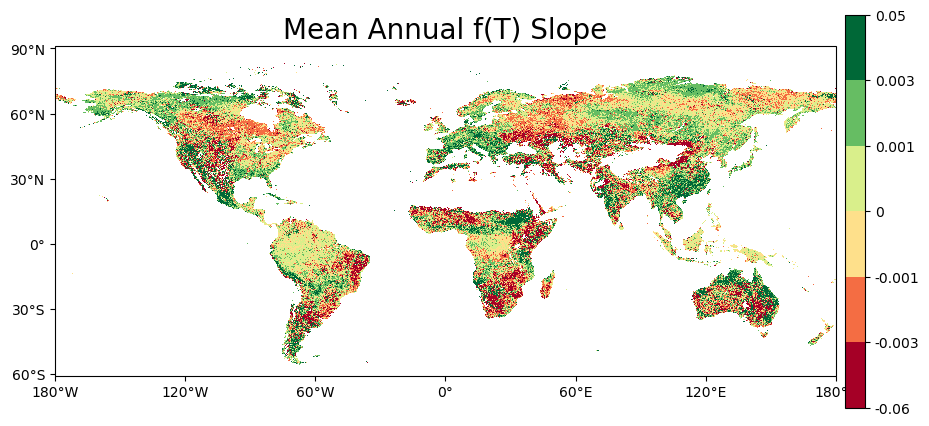

In [15]:
import os
import rasterio
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import cartopy.crs as ccrs
from cartopy.feature import NaturalEarthFeature
from matplotlib.colors import BoundaryNorm

# 红黄蓝色带定义
cmap = plt.get_cmap("RdYlGn")
# cmap = cmap.reversed()  # 翻转色带，红为低值

# fT 文件
fT_slope_file = r"/mnt/d/study/组会/DATA/fT趋势绘图/fT_5yr_slope.tif"

# 打开 TIF 文件
with rasterio.open(fT_slope_file) as src:
    data = src.read(1)
    data[data == src.nodata] = np.nan  # 将 nodata 转为 NaN
    extent = (src.bounds.left, src.bounds.right, src.bounds.bottom, src.bounds.top)

# 定义颜色条带的范围
levels = [-0.06, -0.003, -0.001, 0, 0.001, 0.003, 0.05]
norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)


# 创建绘图窗口，使用 cartopy 的投影
fig = plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.Mercator())

# 显示 TIF 数据
img = ax.imshow(data, cmap=cmap, norm=norm, extent=extent, origin='upper', interpolation='nearest')

# 添加高精度海岸线
coastline_highres = NaturalEarthFeature('physical', 'coastline', '10m', edgecolor='black', facecolor='none')
ax.add_feature(coastline_highres, linewidth=0.2)  # 高精度海岸线

# 设置标题和坐标轴标签
ax.set_title("Mean Annual f(T) Slope", fontsize=20)
# ax.set_xlabel("Longitude")
# ax.set_ylabel("Latitude")

# 设置坐标轴 ticks
ax.set_xticks(np.arange(-180, 181, 60), crs=ccrs.Mercator())
ax.set_xticklabels(
    [f"{abs(x)}°E" if x > 0 else "0°" if x == 0 else f"{abs(x)}°W" for x in np.arange(-180, 181, 60)]
)
ax.set_yticks(np.arange(-90, 91, 30), crs=ccrs.Mercator())
ax.set_yticklabels(
    [f"{abs(y)}°N" if y > 0 else "0°" if y == 0 else f"{abs(y)}°S" for y in np.arange(-90, 91, 30)]
)
ax.set_ylim(-61, 91)

# 添加颜色条
cbar = plt.colorbar(img, ax=ax, orientation='vertical', pad=0.01, aspect=20, shrink=0.85,boundaries=levels, ticks=levels)
cbar.ax.set_yticklabels([f"{level}" for level in levels])

# 保存图片
#plt.savefig("fT_slope_2001-2015.png", dpi=500, bbox_inches='tight')
#plt.close()

#print(f"绘图完成，fT_slope_2001-2015.png")


[Text(1, -0.06, '-0.06'),
 Text(1, -0.003, '-0.003'),
 Text(1, -0.001, '-0.001'),
 Text(1, 0.0, '0'),
 Text(1, 0.001, '0.001'),
 Text(1, 0.003, '0.003'),
 Text(1, 0.05, '0.05')]

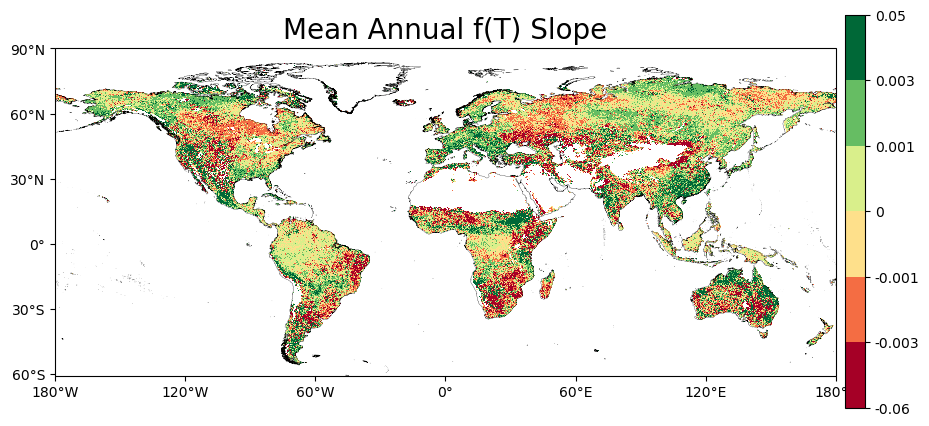

In [14]:
import os
import rasterio
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import cartopy.crs as ccrs
from cartopy.feature import NaturalEarthFeature
from matplotlib.colors import BoundaryNorm

# 红黄蓝色带定义
cmap = plt.get_cmap("RdYlGn")
# cmap = cmap.reversed()  # 翻转色带，红为低值

# fT 文件
fT_slope_file = r"/mnt/d/study/组会/DATA/fT趋势绘图/fT_5yr_slope.tif"

# 打开 TIF 文件
with rasterio.open(fT_slope_file) as src:
    data = src.read(1)
    data[data == src.nodata] = np.nan  # 将 nodata 转为 NaN
    extent = (src.bounds.left, src.bounds.right, src.bounds.bottom, src.bounds.top)

# 定义颜色条带的范围
levels = [-0.06, -0.003, -0.001, 0, 0.001, 0.003, 0.05]
norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)


# 创建绘图窗口，使用 cartopy 的投影
fig = plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.PlateCarree())

# 显示 TIF 数据
img = ax.imshow(data, cmap=cmap, norm=norm, extent=extent, origin='upper', interpolation='nearest')

# 添加高精度海岸线
coastline_highres = NaturalEarthFeature('physical', 'coastline', '10m', edgecolor='black', facecolor='none')
ax.add_feature(coastline_highres, linewidth=0.2)  # 高精度海岸线

# 设置标题和坐标轴标签
ax.set_title("Mean Annual f(T) Slope", fontsize=20)
# ax.set_xlabel("Longitude")
# ax.set_ylabel("Latitude")

# 设置坐标轴 ticks
ax.set_xticks(np.arange(-180, 181, 60), crs=ccrs.PlateCarree())
ax.set_xticklabels(
    [f"{abs(x)}°E" if x > 0 else "0°" if x == 0 else f"{abs(x)}°W" for x in np.arange(-180, 181, 60)]
)
ax.set_yticks(np.arange(-90, 91, 30), crs=ccrs.PlateCarree())
ax.set_yticklabels(
    [f"{abs(y)}°N" if y > 0 else "0°" if y == 0 else f"{abs(y)}°S" for y in np.arange(-90, 91, 30)]
)
ax.set_ylim(-61, 91)

# 添加颜色条
cbar = plt.colorbar(img, ax=ax, orientation='vertical', pad=0.01, aspect=20, shrink=0.85,boundaries=levels, ticks=levels)
cbar.ax.set_yticklabels([f"{level}" for level in levels])

# 保存图片
#plt.savefig("fT_slope_2001-2015.png", dpi=500, bbox_inches='tight')
#plt.close()

#print(f"绘图完成，fT_slope_2001-2015.png")


ERROR 1: PROJ: proj_identify: /home/yqr/miniconda3/envs/area/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
/home/yqr/miniconda3/envs/area/lib/python3.8/site-packages/cartopy/crs.py:256: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  line_strings = list(multi_line_string)
/home/yqr/miniconda3/envs/area/lib/python3.8/site-packages/cartopy/crs.py:256: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  line_strings = list(multi_line_string)
/home/yqr/miniconda3/envs/area/lib/python3.8/site-packages/cartopy/crs.py:402: ShapelyDeprecationWarning: Iteration over multi-part geometries is depr

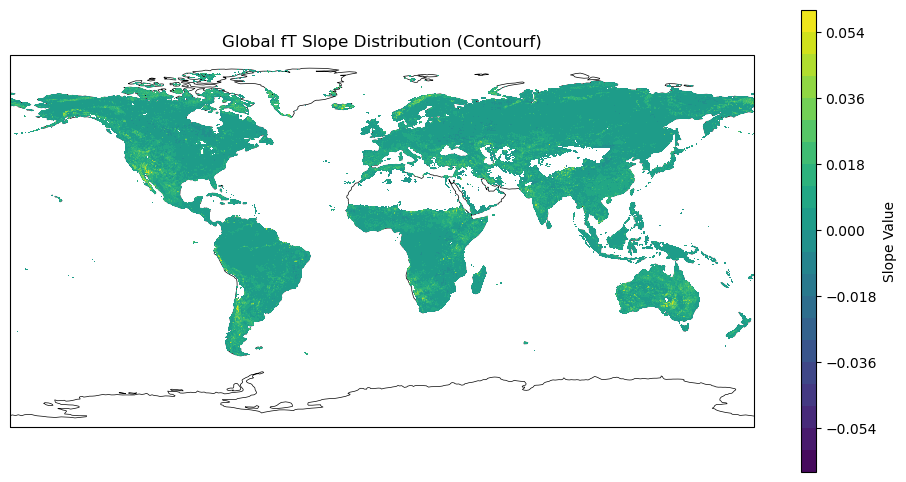

In [ ]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from rasterio.transform import AffineTransformer

# 文件路径
fT_slope_file = r"/mnt/d/study/组会/DATA/fT趋势绘图/fT_5yr_slope.tif"

# 红黄蓝色带定义
cmap = plt.get_cmap("RdYlGn")
# cmap = cmap.reversed()  # 翻转色带，红为低值
# 定义颜色条带的范围
levels = [-0.06, -0.003, -0.001, 0, 0.001, 0.003, 0.05]
norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)

# 读取数据
with rasterio.open(fT_slope_file) as src:
    data = src.read(1)
    data[data == src.nodata] = np.nan
    transform = src.transform
    crs = src.crs.to_string()
    width, height = src.width, src.height

# 生成经纬度网格
rows, cols = np.meshgrid(np.arange(height), np.arange(width), indexing="ij")
transformer = AffineTransformer(transform)
lon, lat = transformer.xy(rows, cols)  # 获取每个像素的经纬度坐标

# 创建地图
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111, projection=ccrs.PlateCarree())

# 添加地理要素
ax.coastlines(resolution='110m', linewidth=0.5)
#ax.add_feature(ccrs.BORDERS, linestyle=':', linewidth=0.5)

# 使用contourf绘制
contour_levels = 20  # 等值线层级数
cf = ax.contourf(lon, lat, data,
                levels=contour_levels,
                cmap=cmap,
                transform=ccrs.PlateCarree())

# 添加颜色条
cbar = plt.colorbar(img, ax=ax, orientation='vertical', pad=0.01, aspect=20, shrink=0.85,boundaries=levels, ticks=levels)
cbar.ax.set_yticklabels([f"{level}" for level in levels])

# 设置标题和范围
plt.title('Global fT Slope Distribution (Contourf)')
ax.set_global()

# 显示或保存
plt.show()
# plt.savefig('contourf_map.png', dpi=300, bbox_inches='tight')

In [20]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from rasterio.transform import AffineTransformer
from matplotlib.colors import BoundaryNorm
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter  # 新增坐标格式化器

# 文件路径
fT_slope_file = r"/mnt/d/study/组会/DATA/fT趋势绘图/fT_5yr_slope.tif"

# 颜色设置
cmap = plt.get_cmap("RdYlGn")
levels = [-0.06, -0.003, -0.001, 0, 0.001, 0.003, 0.05]
norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)

# 读取数据
with rasterio.open(fT_slope_file) as src:
    data = src.read(1)
    data[data == src.nodata] = np.nan
    transform = src.transform
    width, height = src.width, src.height

# 生成经纬度网格
rows, cols = np.meshgrid(np.arange(height), np.arange(width), indexing="ij")
transformer = AffineTransformer(transform)
lon, lat = transformer.xy(rows, cols)

# 创建地图（修改投影为墨卡托）
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111, projection=ccrs.Mercator())  # 修改投影类型

# 添加地理要素
ax.coastlines(resolution='10m', linewidth=0.5)  # 使用更高分辨率海岸线

# 使用contourf绘制（关键修改：添加transform参数）
cf = ax.contourf(lon, lat, data,
                levels=levels,  # 使用预定义的levels
                cmap=cmap,
                norm=norm,
                transform=ccrs.PlateCarree())  # 指定原始数据坐标系

# 设置地图范围（墨卡托建议限制纬度）
ax.set_extent([-180, 180, -60, 80], crs=ccrs.PlateCarree())  # 限制纬度范围

# 配置坐标轴
ax.set_xticks(np.arange(-180, 181, 60), crs=ccrs.PlateCarree())
ax.set_yticks(np.arange(-60, 81, 30), crs=ccrs.PlateCarree())
ax.xaxis.set_major_formatter(LongitudeFormatter())
ax.yaxis.set_major_formatter(LatitudeFormatter())

# 添加颜色条（修正为使用cf）
cbar = plt.colorbar(cf, ax=ax, 
                   orientation='vertical',
                   pad=0.01,
                   aspect=20,
                   shrink=0.85,
                   ticks=levels)
cbar.ax.set_yticklabels([f"{level:.3f}" for level in levels])

# 设置标题
plt.title('Global fT Slope Distribution (Mercator Projection)')

# 显示或保存
#plt.savefig('mercator_contourf.png', dpi=300, bbox_inches='tight')
plt.show()

/home/yqr/miniconda3/envs/area/lib/python3.8/site-packages/cartopy/crs.py:245: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/home/yqr/miniconda3/envs/area/lib/python3.8/site-packages/cartopy/crs.py:297: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/home/yqr/miniconda3/envs/area/lib/python3.8/site-packages/cartopy/crs.py:364: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:
/home/yqr/miniconda3/envs/area/lib/python3.8/site

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7f08413ceaf0> (for post_execute):


KeyboardInterrupt: 

In [5]:
# 读取SST数据
pre_data = xr.open_dataset(r'/mnt/d/study/雁栖湖/气候变化统计与分析/EOF/precip.mon.mean.nc')
# 提取precip变量
precip_ds = pre_data[["precip"]]

# 将提取的变量保存为新的NetCDF文件
#precip_ds.to_netcdf(r'/mnt/d/study/雁栖湖/气候变化统计与分析/EOF/precip.nc')

In [ ]:
os.system('cdo griddes, /mnt/d/study/雁栖湖/气候变化统计与分析/EOF/precip.nc > lonlat_pre')
os.system('sed -i "s/generic/lonlat/g" lonlat_pre')
os.system('cdo setgrid,lonlat_pre   /mnt/d/study/雁栖湖/气候变化统计与分析/EOF/precip.nc  /mnt/d/study/雁栖湖/气候变化统计与分析/EOF/pre_lonlat.nc')

cdo    griddes: Processed 1 variable [0.01s 14MB].
cdo    setgrid: Processed 1 variable over 549 timesteps [0.28s 25MB].


0

In [82]:
cdo.remapbil('r180x90',input= '/mnt/d/study/雁栖湖/气候变化统计与分析/EOF/pre_lonlat.nc',output='/mnt/d/study/雁栖湖/气候变化统计与分析/EOF/pre_remap.nc')

'/mnt/d/study/雁栖湖/气候变化统计与分析/EOF/pre_remap.nc'

In [85]:
cdo.sellonlatbox( '60,160,5,55 ', input = r'/mnt/d/study/雁栖湖/气候变化统计与分析/EOF/pre_remap.nc', output = r'/mnt/d/study/雁栖湖/气候变化统计与分析/EOF/pre_clip.nc')

'/mnt/d/study/雁栖湖/气候变化统计与分析/EOF/pre_clip.nc'

In [3]:
os.system('cdo -s -yearmean -select,season=JJAS -selyear,1979/2024  /mnt/d/study/雁栖湖/气候变化统计与分析/EOF/pre_clip.nc  /mnt/d/study/雁栖湖/气候变化统计与分析/EOF/pre_jjas_mean.nc ')

0

In [5]:
input_folder = '/mnt/d/study/雁栖湖/气候变化统计与分析/EOF/sst/'
output_folder = '/mnt/d/study/雁栖湖/气候变化统计与分析/EOF/sst_clip/'

for file in os.listdir(input_folder):
    if file.endswith(".nc"):
        input_file_path = os.path.join(input_folder, file)
        output_file_path = os.path.join(output_folder, file)
        # 使用sellonlatbox进行裁剪
        cdo.sellonlatbox('120,-80,-60,60', input=input_file_path, output=output_file_path)

In [6]:
# 获取输入文件夹中所有的nc文件路径
input_folder = '/mnt/d/study/雁栖湖/气候变化统计与分析/EOF/sst_clip/'
input_files = [os.path.join(input_folder, file) for file in os.listdir(input_folder) if file.endswith('.nc')]
cdo.mergetime(input=input_files, output='/mnt/d/study/雁栖湖/气候变化统计与分析/EOF/sst.nc')

'/mnt/d/study/雁栖湖/气候变化统计与分析/EOF/sst.nc'

In [2]:
# 读取sst数据
sst_data = xr.open_dataset(r'/mnt/d/study/雁栖湖/气候变化统计与分析/EOF/sst.nc',decode_times=False)  
X = np.array(sst_data.sst[:,0,:,:])

# 读取pre数据
pre_data = xr.open_dataset(r'/mnt/d/study/雁栖湖/气候变化统计与分析/EOF/pre_jjas_mean.nc',decode_times=False)  
Y = np.array(pre_data.precip)

print(X.shape,Y.shape)
#(46,61,81)(46,26,51)

(46, 61, 81) (46, 26, 51)


In [3]:

X_reshaped = X.reshape(X.shape[0], -1)
mean_X = np.mean(X_reshaped, axis = 0)
std_X = np.std(X_reshaped, axis = 0)
X_standardized = (X_reshaped - mean_X) / std_X

missing_value_positions = []
X_data = []
for i in range(46):
    row_data = []
    for j in range(4941):
        if np.isnan(X_standardized[i, j]):
            missing_value_positions.append((i, j))
        else:
            row_data.append(X_standardized[i, j])
    X_data.append(row_data)

X_data = np.array(X_data)


# 重塑Y数据并标准化
Y_reshaped = Y.reshape(Y.shape[0], -1)
mean_Y = np.mean(Y_reshaped, axis = 0)
std_Y = np.std(Y_reshaped, axis = 0)
Y_standardized = (Y_reshaped - mean_Y) / std_Y


# 构建交叉协方差矩阵C = X^T * Y
C = np.dot(X_data.T, Y_standardized)

# 进行SVD分解
U, s, Vt = np.linalg.svd(C)

# 获取SVD1相关信息（这里以第一个奇异向量为例）
L1 = U[:, 0]
R1 = Vt[0, :]
w1 = s[0]

# 将SVD1奇异向量重塑为原始数据的形状
# 将缺测值重新填补回原位置，得到（100,）的数据
reconstructed_data_1d = np.full(4941, np.nan)
new_data_index = 0
for i in range(4941):
    if (np.array(missing_value_positions)[:, 1] == i).any():
        continue
    reconstructed_data_1d[i] = L1[new_data_index]
    new_data_index += 1

L1_original_shape = reconstructed_data_1d.reshape(61, 81)
R1_original_shape = R1.reshape(26, 51)

# 计算时间序列（投影到奇异向量上）
X_L1 = np.dot(X_data, L1)
Y_R1 = np.dot(Y_standardized, R1.T)


In [4]:
# 计算 Tx 与 X 各序列的相关系数矩阵
correlation_homogeneous_Tx_X_matrix = np.zeros((X_data.shape[1]))
for i in range(X_data.shape[0]):
    for j in range(X_data.shape[1]):
        correlation_homogeneous_Tx_X_matrix[j] = np.corrcoef(X_L1, X_data[:, j])[0, 1]
        

# 将SVD1奇异向量重塑为原始数据的形状
correlation_TXX = np.full(4941, np.nan)
new_data_index = 0
for i in range(4941):
    if (np.array(missing_value_positions)[:, 1] == i).any():
        continue
    correlation_TXX[i] = correlation_homogeneous_Tx_X_matrix[new_data_index]
    new_data_index += 1

# 计算 Ty 与 Y 各序列的相关系数矩阵
correlation_homogeneous_Ty_Y_matrix = np.zeros( Y_standardized.shape[1])
for i in range(Y_standardized.shape[0]):
    for j in range(Y_standardized.shape[1]):
        correlation_homogeneous_Ty_Y_matrix[j] = np.corrcoef(Y_R1, Y_standardized[:, j])[0, 1]
        
        
# 异类相关 (heterogeneous)
# 计算 Tx 与 Y 各序列的相关系数矩阵
correlation_heterogeneous_Tx_Y_matrix = np.zeros((Y_standardized.shape[1]))
for j in range(Y_standardized.shape[1]):
    correlation_heterogeneous_Tx_Y_matrix[j] = np.corrcoef(X_L1, Y_standardized[:, j])[0, 1]

# 计算 Ty 与 X 各序列的相关系数矩阵
correlation_heterogeneous_Ty_X_matrix = np.zeros((X_data.shape[1]))
for j in range(X_data.shape[1]):
    correlation_heterogeneous_Ty_X_matrix[j] = np.corrcoef(Y_R1, X_data[:, j])[0, 1]
        
correlation_TYX = np.full(4941, np.nan)
new_data_index = 0
for i in range(4941):
    if (np.array(missing_value_positions)[:, 1] == i).any():
        continue
    correlation_TYX[i] = correlation_heterogeneous_Ty_X_matrix[new_data_index]
    new_data_index += 1
    
correlation_TXX = correlation_TXX.reshape(61, 81)

correlation_TYY = correlation_homogeneous_Ty_Y_matrix.reshape(26, 51)

correlation_TXY = correlation_heterogeneous_Tx_Y_matrix.reshape(26, 51)

correlation_TYX = correlation_TYX.reshape(61, 81)

/home/yqr/miniconda3/envs/area/lib/python3.8/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/yqr/miniconda3/envs/area/lib/python3.8/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [36]:
SFC1 = (w1 ** 2/np.sum(s ** 2)) * 100
pVarX = (np.var(X_L1) / np.var(X_data)) 
pVarY = (np.var(Y_R1) / np.var(Y_standardized)) 

print("SFC1:", SFC1)
print("pVarX:", pVarX)
print("pVarY:", pVarY)


SFC1: 31.46588557242617
pVarX: 936.6202
pVarY: 109.36699


In [11]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from scipy.stats import pearsonr

/home/yqr/miniconda3/envs/area/lib/python3.8/site-packages/cartopy/crs.py:245: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/home/yqr/miniconda3/envs/area/lib/python3.8/site-packages/cartopy/crs.py:256: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  line_strings = list(multi_line_string)
/home/yqr/miniconda3/envs/area/lib/python3.8/site-packages/cartopy/crs.py:256: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  line_strings = list(multi_line_string)
/home/yqr/miniconda3/en

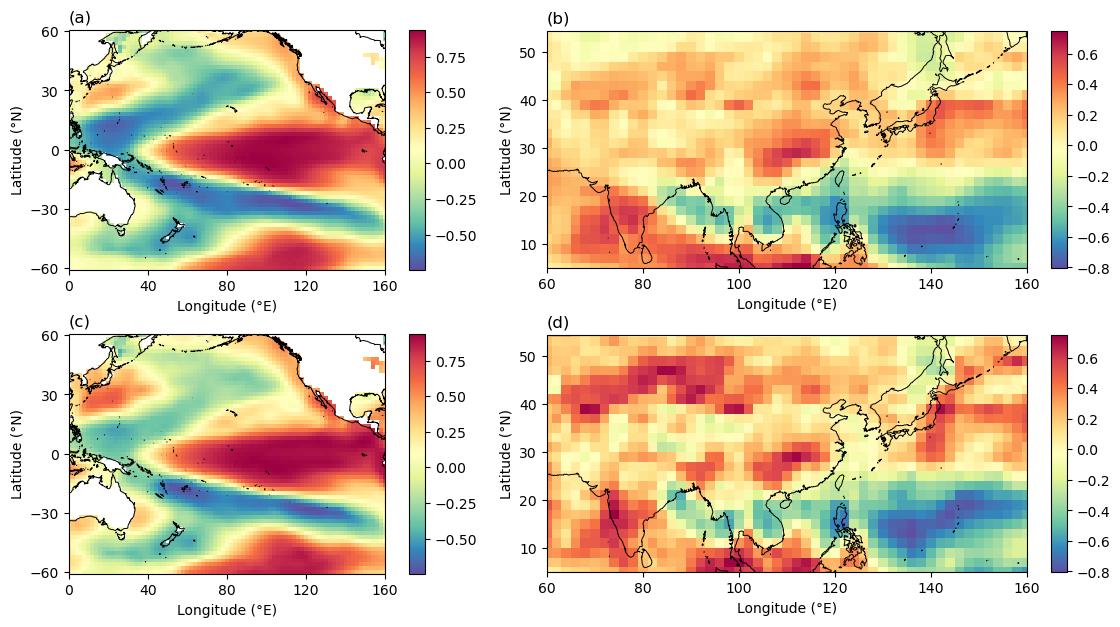

In [26]:
#设置图纸大小
fig=plt.figure(figsize=(8,8))
#设置字体和字号
plt.rcParams['font.sans-serif'] = 'Times New Roman'
plt.rcParams['font.size'] = '10'
y_extent = [ -60, -30, 0, 30, 60]

ax1 = fig.add_axes([0.0,0.0,0.4,0.3],projection=ccrs.PlateCarree(central_longitude=120))

ax1.set_yticks(y_extent)
ax1.set_extent([120,280,-17,17])
#伪彩色图
cf1 = ax1.pcolormesh(np.arange(0,162,2),np.arange(-60,62,2),correlation_TXX,cmap = 'Spectral_r')
ax1.set_xticks([0,40,80,120,160],crs = ccrs.PlateCarree(central_longitude=120))
#设置colorbar的位置
cax = fig.add_axes([ax1.get_position().x1+0.03,ax1.get_position().y0,0.02,ax1.get_position().height])
ax1.add_feature(cfeature.COASTLINE.with_scale('50m'),lw = 0.7)
#添加colorbar
cbar = fig.colorbar(cf1,cax=cax)
ax1.set_xlabel('Longitude (°E)')
ax1.set_ylabel('Latitude (°N)')
ax1.set_title('(a)',loc='left')

ax2 = fig.add_axes([0.6,-0.15,0.6,0.6],projection=ccrs.PlateCarree(central_longitude=0))
x_extent = [60,80,100,120,140,160]
y_extent = [0,10,20,30,40,50, 60]

ax2.set_xticks(x_extent, crs=ccrs.PlateCarree(central_longitude=0))
ax2.set_yticks(y_extent, crs=ccrs.PlateCarree(central_longitude=0))
#伪彩色图
ax2.set_extent([60,160,5,42])
cf2 = ax2.pcolormesh(pre_data.lon,pre_data.lat,correlation_TYY,cmap = 'Spectral_r')
ax2.set_xlabel('Longitude (°E)')
ax2.set_ylabel('Latitude (°N)')
#设置colorbar的位置
cax = fig.add_axes([ax2.get_position().x1+0.03,ax2.get_position().y0,0.02,ax2.get_position().height])

ax2.add_feature(cfeature.COASTLINE.with_scale('50m'),lw = 0.7)
#添加colorbar
cbar = fig.colorbar(cf2,cax=cax)

ax2.set_title('(b)',loc='left')


y_extent = [ -60, -30, 0, 30, 60]

ax3 = fig.add_axes([0.0,-0.38,0.4,0.3],projection=ccrs.PlateCarree(central_longitude=120))

ax3.set_yticks(y_extent)
ax3.set_extent([120,280,-17,17])
#伪彩色图
cf3 = ax3.pcolormesh(np.arange(0,162,2),np.arange(-60,62,2),correlation_TYX,cmap = 'Spectral_r')
ax3.set_xticks([0,40,80,120,160],crs = ccrs.PlateCarree(central_longitude=120))
#设置colorbar的位置
cax = fig.add_axes([ax3.get_position().x1+0.03,ax3.get_position().y0,0.02,ax3.get_position().height])
ax3.add_feature(cfeature.COASTLINE.with_scale('50m'),lw = 0.7)
#添加colorbar
cbar = fig.colorbar(cf1,cax=cax)
ax3.set_xlabel('Longitude (°E)')
ax3.set_ylabel('Latitude (°N)')
ax3.set_title('(c)',loc='left')

ax4 = fig.add_axes([0.6,-0.53,0.6,0.6],projection=ccrs.PlateCarree(central_longitude=0))
x_extent = [60,80,100,120,140,160]
y_extent = [0,10,20,30,40,50, 60]
ax4.set_xticks(x_extent, crs=ccrs.PlateCarree(central_longitude=0))
ax4.set_yticks(y_extent, crs=ccrs.PlateCarree(central_longitude=0))
#伪彩色图
ax4.set_extent([60,160,5,42])
cf4 = ax4.pcolormesh(pre_data.lon,pre_data.lat,correlation_TXY,cmap = 'Spectral_r')
ax4.set_xlabel('Longitude (°E)')
ax4.set_ylabel('Latitude (°N)')
#设置colorbar的位置
cax = fig.add_axes([ax4.get_position().x1+0.03,ax4.get_position().y0,0.02,ax4.get_position().height])

ax4.add_feature(cfeature.COASTLINE.with_scale('50m'),lw = 0.7)
#添加colorbar
cbar = fig.colorbar(cf2,cax=cax)

ax4.set_title('(d)',loc='left')
fig.savefig(r'/mnt/d/study/雁栖湖/气候变化统计与分析/EOF/corr.pdf',format='pdf',dpi=300,bbox_inches = 'tight')


0.7300573852148033 8.546048361891349e-09


/home/yqr/miniconda3/envs/area/lib/python3.8/site-packages/cartopy/crs.py:245: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/home/yqr/miniconda3/envs/area/lib/python3.8/site-packages/cartopy/crs.py:256: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  line_strings = list(multi_line_string)
/home/yqr/miniconda3/envs/area/lib/python3.8/site-packages/cartopy/crs.py:256: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  line_strings = list(multi_line_string)
/home/yqr/miniconda3/en

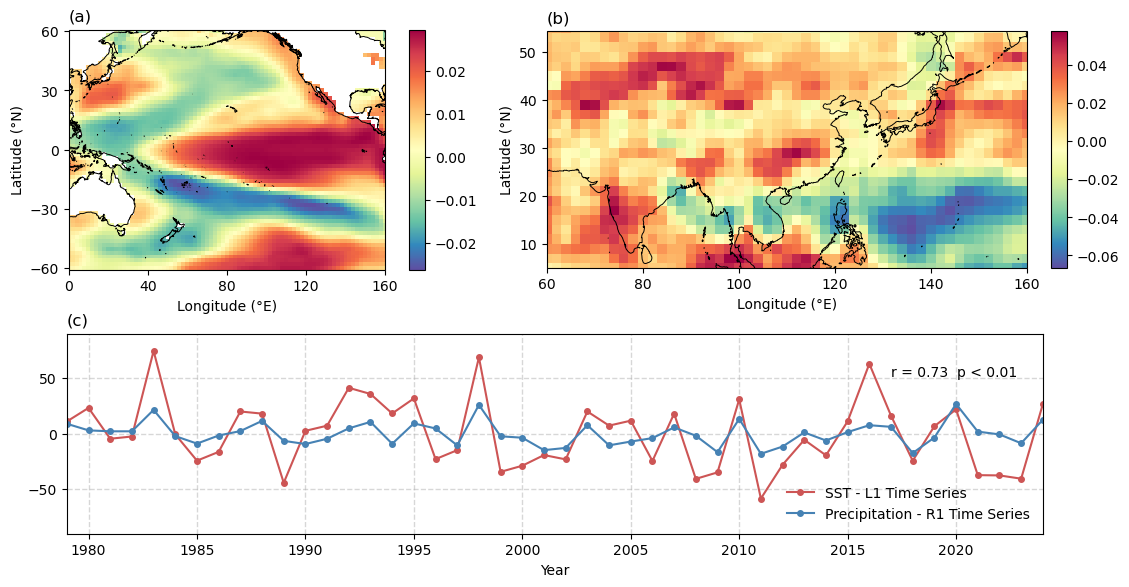

In [17]:
#设置图纸大小
fig=plt.figure(figsize=(8,8))
#设置字体和字号
plt.rcParams['font.sans-serif'] = 'Times New Roman'
plt.rcParams['font.size'] = '10'
y_extent = [ -60, -30, 0, 30, 60]

ax1 = fig.add_axes([0.0,0.0,0.4,0.3],projection=ccrs.PlateCarree(central_longitude=120))

ax1.set_yticks(y_extent)
ax1.set_extent([120,280,-17,17])
#伪彩色图
cf1 = ax1.pcolormesh(np.arange(0,162,2),np.arange(-60,62,2),L1_original_shape,cmap = 'Spectral_r')
ax1.set_xticks([0,40,80,120,160],crs = ccrs.PlateCarree(central_longitude=120))
#设置colorbar的位置
cax = fig.add_axes([ax1.get_position().x1+0.03,ax1.get_position().y0,0.02,ax1.get_position().height])
ax1.add_feature(cfeature.COASTLINE.with_scale('50m'),lw = 0.7)
#添加colorbar
cbar = fig.colorbar(cf1,cax=cax)
ax1.set_xlabel('Longitude (°E)')
ax1.set_ylabel('Latitude (°N)')
ax1.set_title('(a)',loc='left')

ax2 = fig.add_axes([0.6,-0.15,0.6,0.6],projection=ccrs.PlateCarree(central_longitude=0))
x_extent = [60,80,100,120,140,160]
y_extent = [0,10,20,30,40,50, 60]

ax2.set_xticks(x_extent, crs=ccrs.PlateCarree(central_longitude=0))
ax2.set_yticks(y_extent, crs=ccrs.PlateCarree(central_longitude=0))
#伪彩色图
ax2.set_extent([60,160,5,42])
cf2 = ax2.pcolormesh(pre_data.lon,pre_data.lat,R1_original_shape,cmap = 'Spectral_r')
ax2.set_xlabel('Longitude (°E)')
ax2.set_ylabel('Latitude (°N)')
#设置colorbar的位置
cax = fig.add_axes([ax2.get_position().x1+0.03,ax2.get_position().y0,0.02,ax2.get_position().height])

ax2.add_feature(cfeature.COASTLINE.with_scale('50m'),lw = 0.7)
#添加colorbar
cbar = fig.colorbar(cf2,cax=cax)

ax2.set_title('(b)',loc='left')


ax3 = fig.add_axes([0.0,-0.33,1.22,0.25])
ax3.plot(np.arange(1979,2025,1), X_L1, label='SST - L1 Time Series',color = '#CD5555',marker='o',ms='4')
ax3.plot(np.arange(1979,2025,1), Y_R1, label='Precipitation - R1 Time Series',color = '#4682B4',marker='o',ms='4')
ax3.set_xticks([1980,1985,1990,1995,2000,2005,2010,2015,2020])
ax3.set_xlim(1979,2024)
ax3.set_ylim(-90,90)
ax3.set_xlabel('Year')
ax3.legend(frameon=False)
ax3.set_title('(c)',loc='left')
ax3.grid(linestyle='--', alpha=0.5, linewidth=1)

ax3.text(2017, 52, 'r = 0.73  p < 0.01', color='k')
r,p=pearsonr(X_L1,Y_R1)
print(r,p)
fig.savefig(r'/mnt/d/study/雁栖湖/气候变化统计与分析/EOF/SVD1.pdf',format='pdf',dpi=300,bbox_inches = 'tight')

In [46]:
# 获取SVD2相关信息
L2 = U[:, 1]
R2 = Vt[1, :]
w2 = s[1]

# 将SVD2奇异向量重塑为原始数据的形状
# 将缺测值重新填补回原位置，得到（100,）的数据
reconstructed_data_2d = np.full(4941, np.nan)
new_data_index = 0
for i in range(4941):
    if (np.array(missing_value_positions)[:, 1] == i).any():
        continue
    reconstructed_data_2d[i] = L2[new_data_index]
    new_data_index += 1

L2_original_shape = reconstructed_data_2d.reshape(61, 81)
R2_original_shape = R2.reshape(26, 51)

# 计算时间序列（投影到奇异向量上）
X_L2 = np.dot(X_data, L2)
Y_R2 = np.dot(Y_standardized, R2.T)

In [47]:
# 计算 Tx 与 X 各序列的相关系数矩阵
correlation_homogeneous_Tx_X_matrix = np.zeros((X_data.shape[1]))
for i in range(X_data.shape[0]):
    for j in range(X_data.shape[1]):
        correlation_homogeneous_Tx_X_matrix[j] = np.corrcoef(X_L2, X_data[:, j])[0, 1]
        

# 将SVD1奇异向量重塑为原始数据的形状
correlation_TXX = np.full(4941, np.nan)
new_data_index = 0
for i in range(4941):
    if (np.array(missing_value_positions)[:, 1] == i).any():
        continue
    correlation_TXX[i] = correlation_homogeneous_Tx_X_matrix[new_data_index]
    new_data_index += 1

# 计算 Ty 与 Y 各序列的相关系数矩阵
correlation_homogeneous_Ty_Y_matrix = np.zeros( Y_standardized.shape[1])
for i in range(Y_standardized.shape[0]):
    for j in range(Y_standardized.shape[1]):
        correlation_homogeneous_Ty_Y_matrix[j] = np.corrcoef(Y_R2, Y_standardized[:, j])[0, 1]
        
        
# 异类相关 (heterogeneous)
# 计算 Tx 与 Y 各序列的相关系数矩阵
correlation_heterogeneous_Tx_Y_matrix = np.zeros((Y_standardized.shape[1]))
for j in range(Y_standardized.shape[1]):
    correlation_heterogeneous_Tx_Y_matrix[j] = np.corrcoef(X_L2, Y_standardized[:, j])[0, 1]

# 计算 Ty 与 X 各序列的相关系数矩阵
correlation_heterogeneous_Ty_X_matrix = np.zeros((X_data.shape[1]))
for j in range(X_data.shape[1]):
    correlation_heterogeneous_Ty_X_matrix[j] = np.corrcoef(Y_R2, X_data[:, j])[0, 1]
        
correlation_TYX = np.full(4941, np.nan)
new_data_index = 0
for i in range(4941):
    if (np.array(missing_value_positions)[:, 1] == i).any():
        continue
    correlation_TYX[i] = correlation_heterogeneous_Ty_X_matrix[new_data_index]
    new_data_index += 1
    
correlation_TXX = correlation_TXX.reshape(61, 81)

correlation_TYY = correlation_homogeneous_Ty_Y_matrix.reshape(26, 51)

correlation_TXY = correlation_heterogeneous_Tx_Y_matrix.reshape(26, 51)

correlation_TYX = correlation_TYX.reshape(61, 81)

/home/yqr/miniconda3/envs/area/lib/python3.8/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/yqr/miniconda3/envs/area/lib/python3.8/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [ ]:
SFC2 = (w2 ** 2/np.sum(s ** 2)) * 100
pVarX = (np.var(X_L2) / np.var(X_data)) 
pVarY = (np.var(Y_R2) / np.var(Y_standardized)) 

print("SFC2:", SFC2)
print("pVarX:", pVarX)
print("pVarY:", pVarY)


SFC1: 25.574115164442812
pVarX: 646.1933
pVarY: 88.65929


0.8800734020901879 7.916008668495595e-16


/home/yqr/miniconda3/envs/area/lib/python3.8/site-packages/cartopy/crs.py:245: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/home/yqr/miniconda3/envs/area/lib/python3.8/site-packages/cartopy/crs.py:256: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  line_strings = list(multi_line_string)
/home/yqr/miniconda3/envs/area/lib/python3.8/site-packages/cartopy/crs.py:256: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  line_strings = list(multi_line_string)
/home/yqr/miniconda3/en

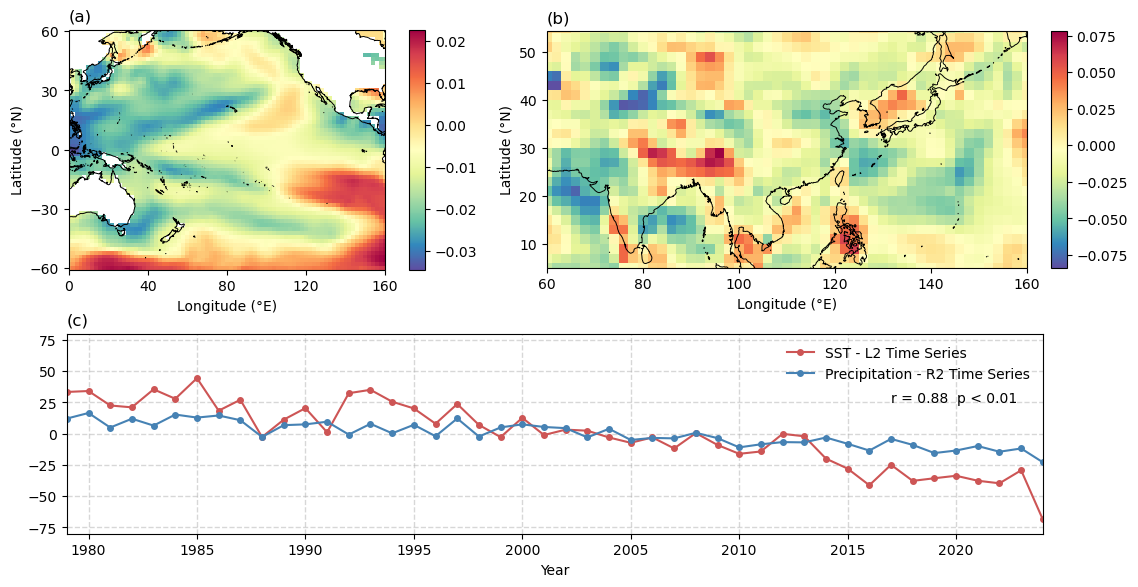

In [55]:
#设置图纸大小
fig=plt.figure(figsize=(8,8))
#设置字体和字号
plt.rcParams['font.sans-serif'] = 'Times New Roman'
plt.rcParams['font.size'] = '10'
y_extent = [ -60, -30, 0, 30, 60]

ax1 = fig.add_axes([0.0,0.0,0.4,0.3],projection=ccrs.PlateCarree(central_longitude=120))

ax1.set_yticks(y_extent)
ax1.set_extent([120,280,-17,17])
#伪彩色图
cf1 = ax1.pcolormesh(np.arange(0,162,2),np.arange(-60,62,2),L2_original_shape,cmap = 'Spectral_r')
ax1.set_xticks([0,40,80,120,160],crs = ccrs.PlateCarree(central_longitude=120))
#设置colorbar的位置
cax = fig.add_axes([ax1.get_position().x1+0.03,ax1.get_position().y0,0.02,ax1.get_position().height])
ax1.add_feature(cfeature.COASTLINE.with_scale('50m'),lw = 0.7)
#添加colorbar
cbar = fig.colorbar(cf1,cax=cax)
ax1.set_xlabel('Longitude (°E)')
ax1.set_ylabel('Latitude (°N)')
ax1.set_title('(a)',loc='left')

ax2 = fig.add_axes([0.6,-0.15,0.6,0.6],projection=ccrs.PlateCarree(central_longitude=0))
x_extent = [60,80,100,120,140,160]
y_extent = [0,10,20,30,40,50, 60]

ax2.set_xticks(x_extent, crs=ccrs.PlateCarree(central_longitude=0))
ax2.set_yticks(y_extent, crs=ccrs.PlateCarree(central_longitude=0))
#伪彩色图
ax2.set_extent([60,160,5,42])
cf2 = ax2.pcolormesh(pre_data.lon,pre_data.lat,R2_original_shape,cmap = 'Spectral_r')
ax2.set_xlabel('Longitude (°E)')
ax2.set_ylabel('Latitude (°N)')
#设置colorbar的位置
cax = fig.add_axes([ax2.get_position().x1+0.03,ax2.get_position().y0,0.02,ax2.get_position().height])

ax2.add_feature(cfeature.COASTLINE.with_scale('50m'),lw = 0.7)
#添加colorbar
cbar = fig.colorbar(cf2,cax=cax)

ax2.set_title('(b)',loc='left')


ax3 = fig.add_axes([0.0,-0.33,1.22,0.25])
ax3.plot(np.arange(1979,2025,1), X_L2, label='SST - L2 Time Series',color = '#CD5555',marker='o',ms='4')
ax3.plot(np.arange(1979,2025,1), Y_R2, label='Precipitation - R2 Time Series',color = '#4682B4',marker='o',ms='4')
ax3.set_xticks([1980,1985,1990,1995,2000,2005,2010,2015,2020])
ax3.set_xlim(1979,2024)
ax3.set_ylim(-80,80)
ax3.set_xlabel('Year')
ax3.legend(frameon=False)
ax3.set_title('(c)',loc='left')
ax3.grid(linestyle='--', alpha=0.5, linewidth=1)

ax3.text(2017, 25, 'r = 0.88  p < 0.01', color='k')
r,p=pearsonr(X_L2,Y_R2)
print(r,p)
fig.savefig(r'/mnt/d/study/雁栖湖/气候变化统计与分析/EOF/SVD2.pdf',format='pdf',dpi=300,bbox_inches = 'tight')

/home/yqr/miniconda3/envs/area/lib/python3.8/site-packages/cartopy/crs.py:245: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/home/yqr/miniconda3/envs/area/lib/python3.8/site-packages/cartopy/crs.py:256: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  line_strings = list(multi_line_string)
/home/yqr/miniconda3/envs/area/lib/python3.8/site-packages/cartopy/crs.py:256: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  line_strings = list(multi_line_string)
/home/yqr/miniconda3/en

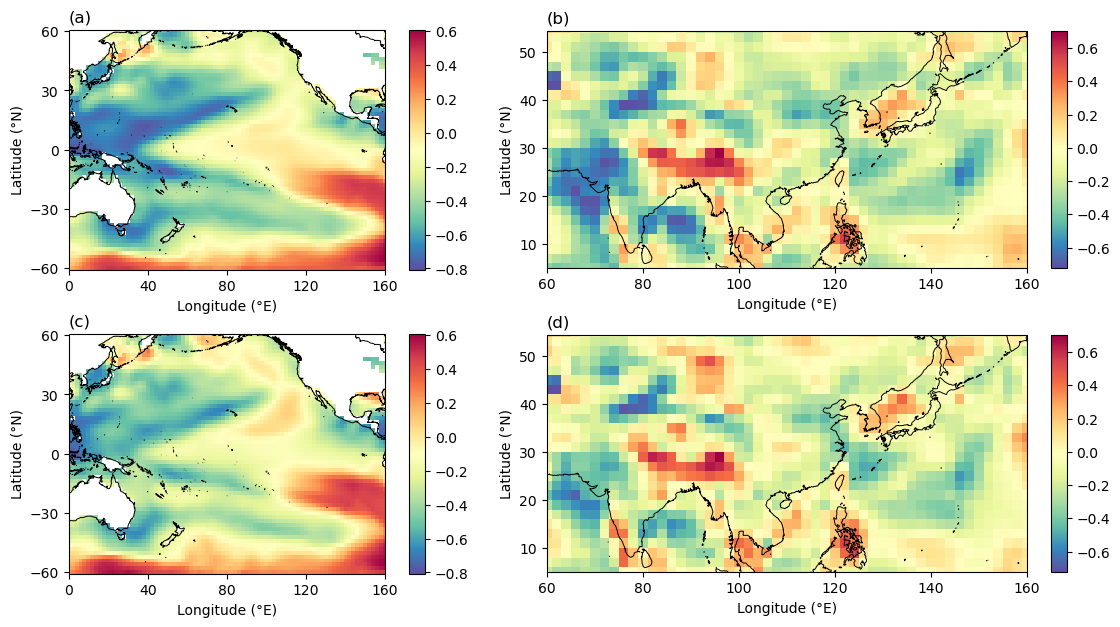

In [57]:
#设置图纸大小
fig=plt.figure(figsize=(8,8))
#设置字体和字号
plt.rcParams['font.sans-serif'] = 'Times New Roman'
plt.rcParams['font.size'] = '10'
y_extent = [ -60, -30, 0, 30, 60]

ax1 = fig.add_axes([0.0,0.0,0.4,0.3],projection=ccrs.PlateCarree(central_longitude=120))

ax1.set_yticks(y_extent)
ax1.set_extent([120,280,-17,17])
#伪彩色图
cf1 = ax1.pcolormesh(np.arange(0,162,2),np.arange(-60,62,2),correlation_TXX,cmap = 'Spectral_r')
ax1.set_xticks([0,40,80,120,160],crs = ccrs.PlateCarree(central_longitude=120))
#设置colorbar的位置
cax = fig.add_axes([ax1.get_position().x1+0.03,ax1.get_position().y0,0.02,ax1.get_position().height])
ax1.add_feature(cfeature.COASTLINE.with_scale('50m'),lw = 0.7)
#添加colorbar
cbar = fig.colorbar(cf1,cax=cax)
ax1.set_xlabel('Longitude (°E)')
ax1.set_ylabel('Latitude (°N)')
ax1.set_title('(a)',loc='left')

ax2 = fig.add_axes([0.6,-0.15,0.6,0.6],projection=ccrs.PlateCarree(central_longitude=0))
x_extent = [60,80,100,120,140,160]
y_extent = [0,10,20,30,40,50, 60]

ax2.set_xticks(x_extent, crs=ccrs.PlateCarree(central_longitude=0))
ax2.set_yticks(y_extent, crs=ccrs.PlateCarree(central_longitude=0))
#伪彩色图
ax2.set_extent([60,160,5,42])
cf2 = ax2.pcolormesh(pre_data.lon,pre_data.lat,correlation_TYY,cmap = 'Spectral_r')
ax2.set_xlabel('Longitude (°E)')
ax2.set_ylabel('Latitude (°N)')
#设置colorbar的位置
cax = fig.add_axes([ax2.get_position().x1+0.03,ax2.get_position().y0,0.02,ax2.get_position().height])

ax2.add_feature(cfeature.COASTLINE.with_scale('50m'),lw = 0.7)
#添加colorbar
cbar = fig.colorbar(cf2,cax=cax)

ax2.set_title('(b)',loc='left')


y_extent = [ -60, -30, 0, 30, 60]

ax3 = fig.add_axes([0.0,-0.38,0.4,0.3],projection=ccrs.PlateCarree(central_longitude=120))

ax3.set_yticks(y_extent)
ax3.set_extent([120,280,-17,17])
#伪彩色图
cf3 = ax3.pcolormesh(np.arange(0,162,2),np.arange(-60,62,2),correlation_TYX,cmap = 'Spectral_r')
ax3.set_xticks([0,40,80,120,160],crs = ccrs.PlateCarree(central_longitude=120))
#设置colorbar的位置
cax = fig.add_axes([ax3.get_position().x1+0.03,ax3.get_position().y0,0.02,ax3.get_position().height])
ax3.add_feature(cfeature.COASTLINE.with_scale('50m'),lw = 0.7)
#添加colorbar
cbar = fig.colorbar(cf1,cax=cax)
ax3.set_xlabel('Longitude (°E)')
ax3.set_ylabel('Latitude (°N)')
ax3.set_title('(c)',loc='left')

ax4 = fig.add_axes([0.6,-0.53,0.6,0.6],projection=ccrs.PlateCarree(central_longitude=0))
x_extent = [60,80,100,120,140,160]
y_extent = [0,10,20,30,40,50, 60]
ax4.set_xticks(x_extent, crs=ccrs.PlateCarree(central_longitude=0))
ax4.set_yticks(y_extent, crs=ccrs.PlateCarree(central_longitude=0))
#伪彩色图
ax4.set_extent([60,160,5,42])
cf4 = ax4.pcolormesh(pre_data.lon,pre_data.lat,correlation_TXY,cmap = 'Spectral_r')
ax4.set_xlabel('Longitude (°E)')
ax4.set_ylabel('Latitude (°N)')
#设置colorbar的位置
cax = fig.add_axes([ax4.get_position().x1+0.03,ax4.get_position().y0,0.02,ax4.get_position().height])

ax4.add_feature(cfeature.COASTLINE.with_scale('50m'),lw = 0.7)
#添加colorbar
cbar = fig.colorbar(cf2,cax=cax)

ax4.set_title('(d)',loc='left')
fig.savefig(r'/mnt/d/study/雁栖湖/气候变化统计与分析/EOF/corr2.pdf',format='pdf',dpi=300,bbox_inches = 'tight')


In [58]:
# 获取SVD3相关信息
L3 = U[:, 2]
R3 = Vt[2, :]
w3 = s[2]

# 将SVD3奇异向量重塑为原始数据的形状
# 将缺测值重新填补回原位置，得到（100,）的数据
reconstructed_data_3d = np.full(4941, np.nan)
new_data_index = 0
for i in range(4941):
    if (np.array(missing_value_positions)[:, 1] == i).any():
        continue
    reconstructed_data_3d[i] = L3[new_data_index]
    new_data_index += 1

L3_original_shape = reconstructed_data_3d.reshape(61, 81)
R3_original_shape = R3.reshape(26, 51)

# 计算时间序列（投影到奇异向量上）
X_L3 = np.dot(X_data, L3)
Y_R3 = np.dot(Y_standardized, R3.T)

0.8492059477083356 8.775700728385942e-14


/home/yqr/miniconda3/envs/area/lib/python3.8/site-packages/cartopy/crs.py:245: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/home/yqr/miniconda3/envs/area/lib/python3.8/site-packages/cartopy/crs.py:256: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  line_strings = list(multi_line_string)
/home/yqr/miniconda3/envs/area/lib/python3.8/site-packages/cartopy/crs.py:256: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  line_strings = list(multi_line_string)
/home/yqr/miniconda3/en

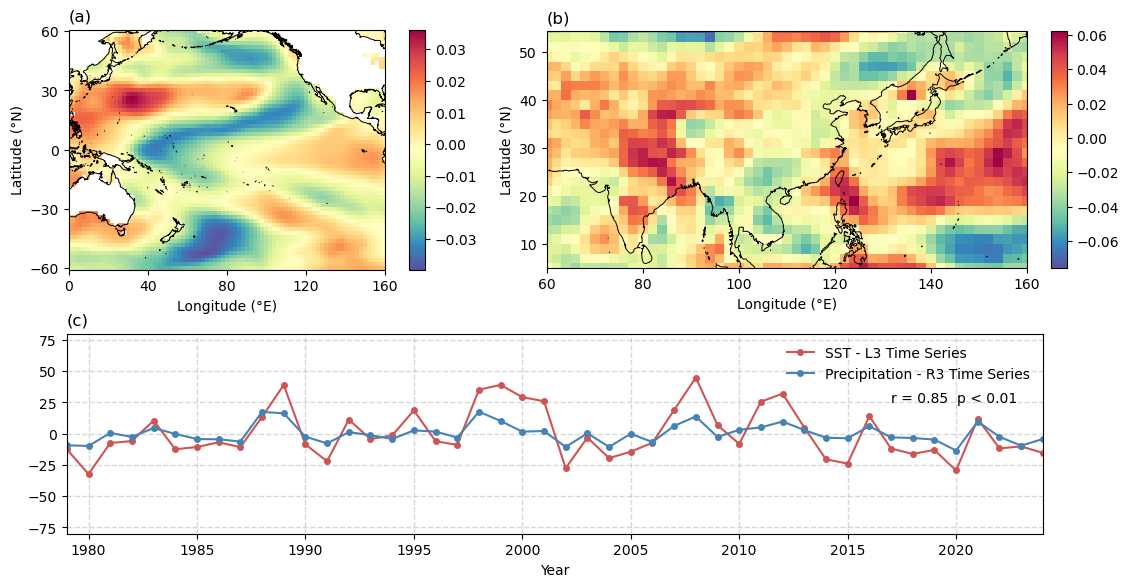

In [62]:
#设置图纸大小
fig=plt.figure(figsize=(8,8))
#设置字体和字号
plt.rcParams['font.sans-serif'] = 'Times New Roman'
plt.rcParams['font.size'] = '10'
y_extent = [ -60, -30, 0, 30, 60]

ax1 = fig.add_axes([0.0,0.0,0.4,0.3],projection=ccrs.PlateCarree(central_longitude=120))

ax1.set_yticks(y_extent)
ax1.set_extent([120,280,-17,17])
#伪彩色图
cf1 = ax1.pcolormesh(np.arange(0,162,2),np.arange(-60,62,2),L3_original_shape,cmap = 'Spectral_r')
ax1.set_xticks([0,40,80,120,160],crs = ccrs.PlateCarree(central_longitude=120))
#设置colorbar的位置
cax = fig.add_axes([ax1.get_position().x1+0.03,ax1.get_position().y0,0.02,ax1.get_position().height])
ax1.add_feature(cfeature.COASTLINE.with_scale('50m'),lw = 0.7)
#添加colorbar
cbar = fig.colorbar(cf1,cax=cax)
ax1.set_xlabel('Longitude (°E)')
ax1.set_ylabel('Latitude (°N)')
ax1.set_title('(a)',loc='left')

ax2 = fig.add_axes([0.6,-0.15,0.6,0.6],projection=ccrs.PlateCarree(central_longitude=0))
x_extent = [60,80,100,120,140,160]
y_extent = [0,10,20,30,40,50, 60]

ax2.set_xticks(x_extent, crs=ccrs.PlateCarree(central_longitude=0))
ax2.set_yticks(y_extent, crs=ccrs.PlateCarree(central_longitude=0))
#伪彩色图
ax2.set_extent([60,160,5,42])
cf2 = ax2.pcolormesh(pre_data.lon,pre_data.lat,R3_original_shape,cmap = 'Spectral_r')
ax2.set_xlabel('Longitude (°E)')
ax2.set_ylabel('Latitude (°N)')
#设置colorbar的位置
cax = fig.add_axes([ax2.get_position().x1+0.03,ax2.get_position().y0,0.02,ax2.get_position().height])

ax2.add_feature(cfeature.COASTLINE.with_scale('50m'),lw = 0.7)
#添加colorbar
cbar = fig.colorbar(cf2,cax=cax)

ax2.set_title('(b)',loc='left')


ax3 = fig.add_axes([0.0,-0.33,1.22,0.25])
ax3.plot(np.arange(1979,2025,1), X_L3, label='SST - L3 Time Series',color = '#CD5555',marker='o',ms='4')
ax3.plot(np.arange(1979,2025,1), Y_R3, label='Precipitation - R3 Time Series',color = '#4682B4',marker='o',ms='4')
ax3.set_xticks([1980,1985,1990,1995,2000,2005,2010,2015,2020])
ax3.set_xlim(1979,2024)
ax3.set_ylim(-80,80)
ax3.set_xlabel('Year')
ax3.legend(frameon=False)
ax3.set_title('(c)',loc='left')
ax3.grid(linestyle='--', alpha=0.5, linewidth=1)

ax3.text(2017, 25, 'r = 0.85  p < 0.01', color='k')
r,p=pearsonr(X_L3,Y_R3)
print(r,p)
fig.savefig(r'/mnt/d/study/雁栖湖/气候变化统计与分析/EOF/SVD3.pdf',format='pdf',dpi=300,bbox_inches = 'tight')

In [59]:
SFC3 = (w3 ** 2/np.sum(s ** 2)) * 100
pVarX = (np.var(X_L3) / np.var(X_data)) 
pVarY = (np.var(Y_R3) / np.var(Y_standardized)) 

print("SFC3:", SFC3)
print("pVarX:", pVarX)
print("pVarY:", pVarY)


SFC3: 8.830852478871538
pVarX: 388.00848
pVarY: 54.75944


In [63]:
# 计算 Tx 与 X 各序列的相关系数矩阵
correlation_homogeneous_Tx_X_matrix = np.zeros((X_data.shape[1]))
for i in range(X_data.shape[0]):
    for j in range(X_data.shape[1]):
        correlation_homogeneous_Tx_X_matrix[j] = np.corrcoef(X_L3, X_data[:, j])[0, 1]
        

# 将SVD1奇异向量重塑为原始数据的形状
correlation_TXX = np.full(4941, np.nan)
new_data_index = 0
for i in range(4941):
    if (np.array(missing_value_positions)[:, 1] == i).any():
        continue
    correlation_TXX[i] = correlation_homogeneous_Tx_X_matrix[new_data_index]
    new_data_index += 1

# 计算 Ty 与 Y 各序列的相关系数矩阵
correlation_homogeneous_Ty_Y_matrix = np.zeros( Y_standardized.shape[1])
for i in range(Y_standardized.shape[0]):
    for j in range(Y_standardized.shape[1]):
        correlation_homogeneous_Ty_Y_matrix[j] = np.corrcoef(Y_R3, Y_standardized[:, j])[0, 1]
        
        
# 异类相关 (heterogeneous)
# 计算 Tx 与 Y 各序列的相关系数矩阵
correlation_heterogeneous_Tx_Y_matrix = np.zeros((Y_standardized.shape[1]))
for j in range(Y_standardized.shape[1]):
    correlation_heterogeneous_Tx_Y_matrix[j] = np.corrcoef(X_L3, Y_standardized[:, j])[0, 1]

# 计算 Ty 与 X 各序列的相关系数矩阵
correlation_heterogeneous_Ty_X_matrix = np.zeros((X_data.shape[1]))
for j in range(X_data.shape[1]):
    correlation_heterogeneous_Ty_X_matrix[j] = np.corrcoef(Y_R3, X_data[:, j])[0, 1]
        
correlation_TYX = np.full(4941, np.nan)
new_data_index = 0
for i in range(4941):
    if (np.array(missing_value_positions)[:, 1] == i).any():
        continue
    correlation_TYX[i] = correlation_heterogeneous_Ty_X_matrix[new_data_index]
    new_data_index += 1
    
correlation_TXX = correlation_TXX.reshape(61, 81)

correlation_TYY = correlation_homogeneous_Ty_Y_matrix.reshape(26, 51)

correlation_TXY = correlation_heterogeneous_Tx_Y_matrix.reshape(26, 51)

correlation_TYX = correlation_TYX.reshape(61, 81)

/home/yqr/miniconda3/envs/area/lib/python3.8/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/yqr/miniconda3/envs/area/lib/python3.8/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


/home/yqr/miniconda3/envs/area/lib/python3.8/site-packages/cartopy/crs.py:245: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/home/yqr/miniconda3/envs/area/lib/python3.8/site-packages/cartopy/crs.py:256: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  line_strings = list(multi_line_string)
/home/yqr/miniconda3/envs/area/lib/python3.8/site-packages/cartopy/crs.py:256: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  line_strings = list(multi_line_string)
/home/yqr/miniconda3/en

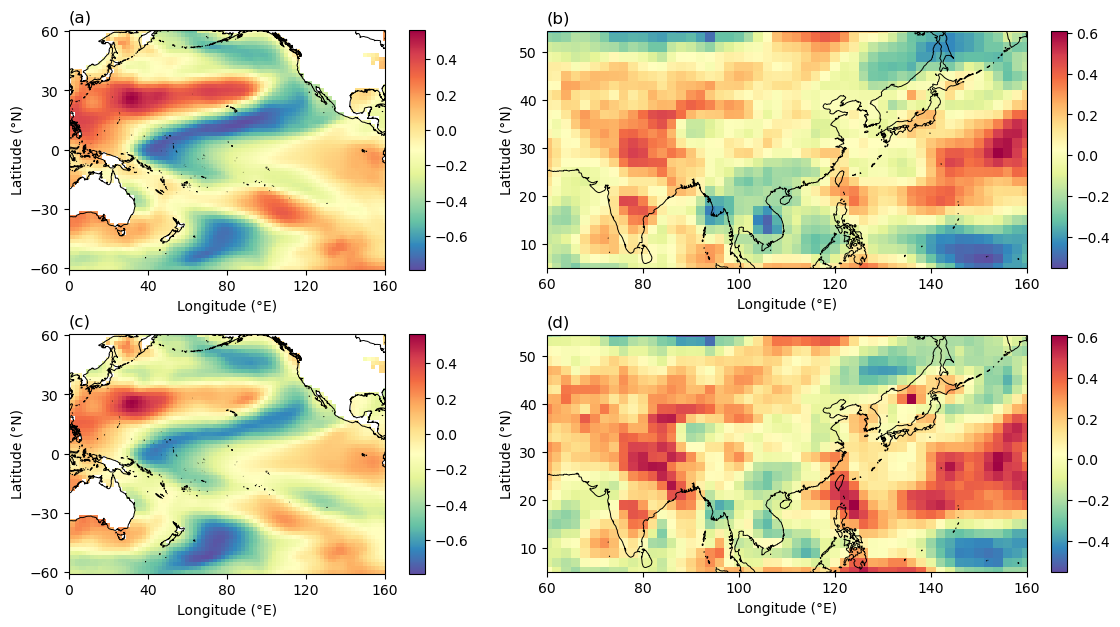

In [64]:
#设置图纸大小
fig=plt.figure(figsize=(8,8))
#设置字体和字号
plt.rcParams['font.sans-serif'] = 'Times New Roman'
plt.rcParams['font.size'] = '10'
y_extent = [ -60, -30, 0, 30, 60]

ax1 = fig.add_axes([0.0,0.0,0.4,0.3],projection=ccrs.PlateCarree(central_longitude=120))

ax1.set_yticks(y_extent)
ax1.set_extent([120,280,-17,17])
#伪彩色图
cf1 = ax1.pcolormesh(np.arange(0,162,2),np.arange(-60,62,2),correlation_TXX,cmap = 'Spectral_r')
ax1.set_xticks([0,40,80,120,160],crs = ccrs.PlateCarree(central_longitude=120))
#设置colorbar的位置
cax = fig.add_axes([ax1.get_position().x1+0.03,ax1.get_position().y0,0.02,ax1.get_position().height])
ax1.add_feature(cfeature.COASTLINE.with_scale('50m'),lw = 0.7)
#添加colorbar
cbar = fig.colorbar(cf1,cax=cax)
ax1.set_xlabel('Longitude (°E)')
ax1.set_ylabel('Latitude (°N)')
ax1.set_title('(a)',loc='left')

ax2 = fig.add_axes([0.6,-0.15,0.6,0.6],projection=ccrs.PlateCarree(central_longitude=0))
x_extent = [60,80,100,120,140,160]
y_extent = [0,10,20,30,40,50, 60]

ax2.set_xticks(x_extent, crs=ccrs.PlateCarree(central_longitude=0))
ax2.set_yticks(y_extent, crs=ccrs.PlateCarree(central_longitude=0))
#伪彩色图
ax2.set_extent([60,160,5,42])
cf2 = ax2.pcolormesh(pre_data.lon,pre_data.lat,correlation_TYY,cmap = 'Spectral_r')
ax2.set_xlabel('Longitude (°E)')
ax2.set_ylabel('Latitude (°N)')
#设置colorbar的位置
cax = fig.add_axes([ax2.get_position().x1+0.03,ax2.get_position().y0,0.02,ax2.get_position().height])

ax2.add_feature(cfeature.COASTLINE.with_scale('50m'),lw = 0.7)
#添加colorbar
cbar = fig.colorbar(cf2,cax=cax)

ax2.set_title('(b)',loc='left')


y_extent = [ -60, -30, 0, 30, 60]

ax3 = fig.add_axes([0.0,-0.38,0.4,0.3],projection=ccrs.PlateCarree(central_longitude=120))

ax3.set_yticks(y_extent)
ax3.set_extent([120,280,-17,17])
#伪彩色图
cf3 = ax3.pcolormesh(np.arange(0,162,2),np.arange(-60,62,2),correlation_TYX,cmap = 'Spectral_r')
ax3.set_xticks([0,40,80,120,160],crs = ccrs.PlateCarree(central_longitude=120))
#设置colorbar的位置
cax = fig.add_axes([ax3.get_position().x1+0.03,ax3.get_position().y0,0.02,ax3.get_position().height])
ax3.add_feature(cfeature.COASTLINE.with_scale('50m'),lw = 0.7)
#添加colorbar
cbar = fig.colorbar(cf1,cax=cax)
ax3.set_xlabel('Longitude (°E)')
ax3.set_ylabel('Latitude (°N)')
ax3.set_title('(c)',loc='left')

ax4 = fig.add_axes([0.6,-0.53,0.6,0.6],projection=ccrs.PlateCarree(central_longitude=0))
x_extent = [60,80,100,120,140,160]
y_extent = [0,10,20,30,40,50, 60]
ax4.set_xticks(x_extent, crs=ccrs.PlateCarree(central_longitude=0))
ax4.set_yticks(y_extent, crs=ccrs.PlateCarree(central_longitude=0))
#伪彩色图
ax4.set_extent([60,160,5,42])
cf4 = ax4.pcolormesh(pre_data.lon,pre_data.lat,correlation_TXY,cmap = 'Spectral_r')
ax4.set_xlabel('Longitude (°E)')
ax4.set_ylabel('Latitude (°N)')
#设置colorbar的位置
cax = fig.add_axes([ax4.get_position().x1+0.03,ax4.get_position().y0,0.02,ax4.get_position().height])

ax4.add_feature(cfeature.COASTLINE.with_scale('50m'),lw = 0.7)
#添加colorbar
cbar = fig.colorbar(cf2,cax=cax)

ax4.set_title('(d)',loc='left')
fig.savefig(r'/mnt/d/study/雁栖湖/气候变化统计与分析/EOF/corr3.pdf',format='pdf',dpi=300,bbox_inches = 'tight')


In [ ]:
import rasterio
import pandas as pd

# 读取包含站点经纬度信息的CSV文件
df_stations = pd.read_csv('/mnt/d/study/组会/data/SOC/bd_soc.csv')

# 定义三年对应的TIFF文件路径
tiff_files = ['/mnt/f/MODIS-NPP/MOD17A3/MOD17A3HGF.061_Npp_500m_doy2009001_aid0001.tif',
              '/mnt/f/MODIS-NPP/MOD17A3/MOD17A3HGF.061_Npp_500m_doy2015001_aid0001.tif',
              '/mnt/f/MODIS-NPP/MOD17A3/MOD17A3HGF.061_Npp_500m_doy2018001_aid0001.tif']


def extract_env_factor(lon, lat, raster_path):
    with rasterio.open(raster_path) as src:
        row, col = src.index(lon, lat)
        value = src.read(1)[row, col]
        return value

# 用于存储提取结果的字典，键为(station_index, year)，值为数据值
results_dict = {}
for files in tiff_files:
    # 使用rasterio打开对应年份的tiff文件
    with rasterio.open(files) as src:
        transform = src.transform
        width = src.width
        height = src.height
        lat = row['TH_LAT']
        lon = row['TH_LONG']
        value_2009 = extract_env_factor(lon, lat, files)
        value_2015 = extract_env_factor(lon, lat, files)
        value_2019 = extract_env_factor(lon, lat, files)


TypeError: 'float' object is not subscriptable

In [11]:
import rasterio
import pandas as pd

# 读取包含站点经纬度信息的CSV文件
df_stations = pd.read_csv('/mnt/d/study/组会/data/SOC/bd_soc.csv')

# 定义三年对应的TIFF文件路径
tiff_files = ['/mnt/f/MODIS-NPP/MOD17A3/MOD17A3HGF.061_Npp_500m_doy2009001_aid0001.tif']

lat1 = df_stations['TH_LAT'][0]
lon1 = df_stations['TH_LONG'][0]
lat1,lon1

(56.10980833, -5.115225304)

In [1]:
import rasterio
import pandas as pd
from concurrent.futures import ThreadPoolExecutor

# 读取包含站点经纬度信息的CSV文件
df_stations = pd.read_csv('/mnt/d/study/组会/data/SOC/bd_soc_2.csv')

# 定义三年对应的TIFF文件路径
tiff_files = ['/mnt/f/MODIS-NPP/MOD17A3/MOD17A3HGF.061_Npp_500m_doy2009001_aid0001.tif',
              '/mnt/f/MODIS-NPP/MOD17A3/MOD17A3HGF.061_Npp_500m_doy2015001_aid0001.tif',
              '/mnt/f/MODIS-NPP/MOD17A3/MOD17A3HGF.061_Npp_500m_doy2018001_aid0001.tif']


# 用于存储提取结果的字典，键为(station_index, year)，值为数据值
results_dict = {}


def process_file(files):
    """
    处理单个TIFF文件，提取对应站点的数据并存储到results_dict中。
    :param files: TIFF文件路径
    """
    year_str = files.split('doy')[1][0:4]
    year = int(year_str)
    with rasterio.open(files) as src:
        transform = src.transform
        width = src.width
        height = src.height
        for index, row in df_stations.iterrows():
            lat = row['TH_LAT']
            lon = row['TH_LONG']
            row, col = src.index(lon, lat)
            value = src.read(1)[row, col]
            results_dict[(index, year)] = value


# 创建线程池，可根据实际情况调整线程数量，这里设置为3（和TIFF文件数量相同只是示例，可灵活调整）
with ThreadPoolExecutor(max_workers=2) as executor:
    executor.map(process_file, tiff_files)

# 后续代码可继续保持不变，比如将提取的数据添加到原DataFrame中，并保存为新的CSV文件
# 在原DataFrame中增加新的列
for index, row in df_stations.iterrows():
    for year in [2009, 2015, 2018]:
        if (index, year) in results_dict:
            df_stations.at[index, str(year)] = results_dict[(index, year)]
        else:
            df_stations.at[index, str(year)] = None

# 将更新后的DataFrame保存为新的CSV文件
df_stations.to_csv('/mnt/d/study/组会/data/SOC/npp_soc.csv', index=False)


: 

In [ ]:
import rasterio
import pandas as pd
import numpy as np
import os

# 设置包含特定点经纬度信息的CSV文件的绝对路径
csv_file_path = r'C:\your\absolute\path\soil_bd_npp_soc.csv'
# 读取包含特定点经纬度信息的CSV文件
points_df = pd.read_csv(csv_file_path)
lat_columns = ['TH_LAT_x']
lon_columns = ['TH_LONG_x']

# 假设存放各年份文件夹的根目录的绝对路径
root_folder_path = r'/mnt/f/ERA5-LAND/tiff/Tmean_tif'

# 用于存储每个特定点的平均温度
point_avg_temperature_data = {}

# 遍历每个特定点
for index in range(len(points_df)):
    point_lats = [points_df.at[index, col] for col in lat_columns]
    point_lons = [points_df.at[index, col] for col in lon_columns]
    all_temperature_values = []
    # 遍历年份范围
    for year in range(2009, 2016):
        year_folder = str(year)
        year_folder_path = os.path.join(root_folder_path, year_folder)
        tiff_files = [os.path.join(year_folder_path, file) for file in os.listdir(year_folder_path) if file.endswith('.tif')]
        # 遍历当年的每个TIFF文件
        for tiff_file in tiff_files:
            with rasterio.open(tiff_file) as src:
                for lat, lon in zip(point_lats, point_lons):
                    row, col = src.index(lon, lat)
                    all_temperature_values.append(src.read(1)[row, col])
    # 计算该点2009 - 2015年的平均温度
    avg_temperature = np.nanmean(all_temperature_values) if all_temperature_values else np.nan
    point_id = index  
    point_avg_temperature_data[point_id] = avg_temperature

# 将平均温度数据添加到原始CSV文件对应的点记录中
for point_id, temperature in point_avg_temperature_data.items():
    points_df.at[point_id, 'Avg_Temperature_2009_2015'] = temperature

# 设置保存更新后的CSV文件的绝对路径
new_csv_file_path = r'/mnt/d/study/组会/data/soc/soil_tem.csv'
# 保存更新后的CSV文件
points_df.to_csv(new_csv_file_path, index=False)

In [ ]:
import rasterio
import pandas as pd
import numpy as np
import os

# 设置包含特定点经纬度信息的CSV文件的绝对路径
csv_file_path = r'C:\your\absolute\path\soil_bd_npp_soc.csv'
# 读取包含特定点经纬度信息的CSV文件
points_df = pd.read_csv(csv_file_path)
lat_columns = ['TH_LAT_x']
lon_columns = ['TH_LONG_x']

# 假设存放各年份文件夹的根目录的绝对路径
root_folder_path = r'/mnt/f/ERA5-LAND/tiff/Tmean_tif'

# 用于存储每个特定点的平均温度
point_avg_temperature_data = {}

# 遍历每个特定点
for index in range(len(points_df)):
    point_lats = [points_df.at[index, col] for col in lat_columns]
    point_lons = [points_df.at[index, col] for col in lon_columns]
    all_temperature_values = []
    # 遍历年份范围
    for year in range(2009):
        year_folder = str(year)
        year_folder_path = os.path.join(root_folder_path, year_folder)
        tiff_files = [os.path.join(year_folder_path, file) for file in os.listdir(year_folder_path) if file.endswith('.tif')]
        # 遍历当年的每个TIFF文件
        for tiff_file in tiff_files:
            with rasterio.open(tiff_file) as src:
                for lat, lon in zip(point_lats, point_lons):
                    row, col = src.index(lon, lat)
                    all_temperature_values.append(src.read(1)[row, col])
    # 计算该点2009 - 2015年的平均温度
    avg_temperature = np.nanmean(all_temperature_values) if all_temperature_values else np.nan
    point_id = index  
    point_avg_temperature_data[point_id] = avg_temperature

# 将平均温度数据添加到原始CSV文件对应的点记录中
for point_id, temperature in point_avg_temperature_data.items():
    points_df.at[point_id, 'Avg_Temperature_2009_2015'] = temperature

# 设置保存更新后的CSV文件的绝对路径
new_csv_file_path = r'/mnt/d/study/组会/data/soc/soil_tem.csv'
# 保存更新后的CSV文件
points_df.to_csv(new_csv_file_path, index=False)

In [12]:
tiff_file = r'/mnt/f/ERA5-LAND/tiff/Tmean_tif/1981/ERA5Land_Tmean_1981-01-01_001.tif'
# 遍历当年的每个TIFF文件
for index in range(len(points_df)):
    point_lats = [points_df.at[index, col] for col in lat_columns]
    point_lons = [points_df.at[index, col] for col in lon_columns]
    with rasterio.open(tiff_file) as src:
        for lat, lon in zip(point_lats, point_lons):
            row, col = src.index(lon, lat)
            all_temperature_values.append(src.read(1)[row, col])

KeyboardInterrupt: 

In [13]:
tiff_file = r'/mnt/f/ERA5-LAND/tiff/Tmean_tif/1981/ERA5Land_Tmean_1981-01-01_001.tif'

with rasterio.open(tiff_file) as src:
    for lat, lon in zip(point_lats, point_lons):
        row, col = src.index(lon, lat)
        all_temperature_values.append(src.read(1)[row, col])
        print(all_temperature_values)

[270.90378, 275.64526, 275.23547, 276.12393, 278.41885, 274.46777, 276.0145, 278.1031, 276.26248, 272.16452, 279.42505, 273.93283, 277.29245, 275.05707, 277.34448, 277.78403, 276.49478, 278.20905, 276.9214, 277.29245, 278.83148, 276.3563, 273.4205, 278.13052, 278.99716, 280.66315, 276.8173, 278.0048, 277.8508, 277.58502, 275.86575, 277.2717, 277.6907, 276.6768, 278.08176, 276.83685, 276.12393, 277.04922, 277.45404, 273.8861, 275.24557, 278.35693, 273.43796, 278.18396, 279.66586, 278.4498, 279.1616, 281.18698, 278.09772, 278.2874, 279.04642, 278.11487, 278.42572, 278.321, 278.01425, 279.83167, 280.07156, 278.43222, 279.1207, 278.26965, 279.83633, 277.9181, 278.2783, 277.98773, 278.38025, 278.2783, 278.17432, 277.87097, 277.95087, 277.94223, 277.87497, 277.7171, 277.9082, 278.3537, 277.87497, 277.9091, 277.96405, 278.02335, 277.8773, 277.9409, 277.98776, 276.26102, 278.70905, 278.121, 278.53714, 277.87497, 278.3858, 278.3537, 278.22018, 278.3493, 278.34338, 276.43097, 278.0326, 274.38495

In [15]:
len(all_temperature_values)

1320